Import

In [1]:
%load_ext autoreload
%autoreload 2

from model import Net
from dataloader import *
from dataloader_utils import *
from yolo_utils import *
from loss import *

import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'
import torch
import sys
sys.argv.append("-Xfrozen_modules=off")

%matplotlib inline

load model

In [3]:
model = Net(device="cpu")
model.load_weights("checkpoints/weights220.pth")

Weights loaded.


Test on my own image

Predicting


0it [00:00, ?it/s]


[{'cx': 0.5059522475515094, 'cy': 0.4961166637284415, 'w': 0.93601704, 'h': 0.98308176, 'class': 'person', 'confidence': 0.97632784, 'width': 448, 'height': 448, 'xmin': 16, 'ymin': 2, 'xmax': 436, 'ymax': 442}]


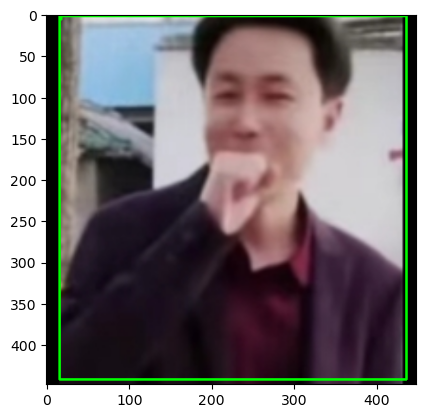

In [11]:
image_path = "my_images/xiucai.png"

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image, _ = image_resize2sq(image, [])
# image = cv2.resize(image, (INPUT_SIDE, INPUT_SIDE))

images = [image]

boxes = model.predict(images)[0]

# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = plot_bbox_on_image(image, boxes)
print(boxes)
plt.imshow(image)